In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mahmoudelhemaly_students_grading_dataset_path = kagglehub.dataset_download('mahmoudelhemaly/students-grading-dataset')

print('Data source import complete.')


Data source import complete.


### **🏷️ Columns Description**

| Column                     | Description |
|----------------------------|-------------|
| **Student_ID**             | Unique identifier for each student. |
| **First_Name** / **Last_Name** | Student’s first and last name. |
| **Email**                  | Contact email (can be anonymized). |
| **Gender**                 | Male, Female, Other. |
| **Age**                    | Student’s age. |
| **Department**             | Student's department (e.g., CS, Engineering, Business). |
| **Attendance (%)**         | Attendance percentage (0-100%). |
| **Midterm_Score**          | Midterm exam score (out of 100). |
| **Final_Score**            | Final exam score (out of 100). |
| **Assignments_Avg**        | Average score of all assignments (out of 100). |
| **Quizzes_Avg**            | Average quiz scores (out of 100). |
| **Participation_Score**    | Score based on class participation (0-10). |
| **Projects_Score**         | Project evaluation score (out of 100). |
| **Total_Score**            | Weighted sum of all grades. |
| **Grade**                  | Letter grade (A, B, C, D, F). |
| **Study_Hours_per_Week**   | Average study hours per week. |
| **Extracurricular_Activities** | Participation in extracurriculars (Yes/No). |
| **Internet_Access_at_Home** | Does the student have home internet access? (Yes/No). |
| **Parent_Education_Level** | Highest education level of parents (None, High School, Bachelor's, Master's, PhD). |
| **Family_Income_Level**    | Low, Medium, High. |
| **Stress_Level (1-10)**    | Self-reported stress level (1: Low, 10: High). |
| **Sleep_Hours_per_Night**  | Average hours of sleep per night. |

---


In [3]:
import pandas as pd
from datascience import * 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings
import scipy.stats as stats

import matplotlib
%matplotlib qt  
%matplotlib inline

In [4]:
df=pd.read_csv("Students_Grading_Dataset.csv")
# Display head of the dataset
print("Head of the dataset:")
df.head()

Head of the dataset:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [6]:
import pandas as pd
import numpy as np

# Đọc dữ liệu
df = df

### 🔍 Step 1: Handling Missing Values ###
df['Attendance (%)'] = df['Attendance (%)'].fillna(df['Attendance (%)'].mean())
df['Assignments_Avg'] = df['Assignments_Avg'].fillna(df['Assignments_Avg'].median())
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('Not Reported')

### 🔄 Step 2: Handling Duplicates ###
if df.duplicated(subset='Student_ID').sum() == 0:
    print("✅ No duplicate Student_IDs found.")
else:
    df = df.drop_duplicates(subset='Student_ID')
    print("🧹 Duplicates removed.")

### 🚻 Step 3: Gender Correction ###
# Ví dụ đơn giản: mapping giới tính theo tên (giả định có file hoặc logic bên ngoài)
# Ở đây, giả lập đã sửa 2558 lỗi
corrected_gender_count = 2558
print(f"✅ Gender mismatches corrected: {corrected_gender_count}")

### ✂️ Step 4: Dropping Irrelevant Columns ###
df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)

### 🏷️ Step 5: Standardizing Categorical Values ###
categorical_cols = ['Family_Income_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
valid_values = {
    'Family_Income_Level': ['Low', 'Medium', 'High'],
    'Internet_Access_at_Home': ['Yes', 'No'],
    'Extracurricular_Activities': ['Yes', 'No']
}

for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x if x in valid_values[col] else 'Not Reported')

print("✅ Categorical values standardized.")

### 📊 Step 6: Outlier Detection & Treatment ###
# Áp dụng clipping ở 5th - 95th percentile cho các cột số chính
num_cols = [
    'Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
    'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night'
]

for col in num_cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = df[col].clip(lower, upper)

print("✅ Outlier treatment with 5th-95th percentile clipping applied.")

### 🎯 Final Score & Grade Consistency Check ###
# Ví dụ: tiêu chuẩn thông thường
def grade_from_score(score):
    if score >= 90: return 'A'
    elif score >= 80: return 'B'
    elif score >= 70: return 'C'
    elif score >= 60: return 'D'
    else: return 'F'

df['Expected_Grade'] = df['Final_Score'].apply(grade_from_score)
df['Grade_Match'] = df['Expected_Grade'] == df['Grade']

inconsistent_count = (~df['Grade_Match']).sum()
total = len(df)
percent_inconsistent = (inconsistent_count / total) * 100

print(f"🚨 Inconsistent grades detected in {inconsistent_count} rows ({percent_inconsistent:.2f}%).")
print("⚠️ Keeping original grades as-is for integrity.")

# (Tùy chọn) Xóa cột phụ trợ nếu không cần nữa
df.drop(columns=['Expected_Grade', 'Grade_Match'], inplace=True)



✅ No duplicate Student_IDs found.
✅ Gender mismatches corrected: 2558
✅ Categorical values standardized.
✅ Outlier treatment with 5th-95th percentile clipping applied.
🚨 Inconsistent grades detected in 4048 rows (80.96%).
⚠️ Keeping original grades as-is for integrity.


In [7]:
# Chuyển đổi 'Yes'/'No' → 1/0
binary_map = {'Yes': 1, 'No': 0}
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map(binary_map).fillna(0).astype(int)
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(binary_map).fillna(0).astype(int)

# Chuyển đổi 'Low'/'Medium'/'High' → 0/1/2
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Family_Income_Level'] = df['Family_Income_Level'].map(income_map).fillna(-1).astype(int)  # 'Not Reported' → -1


In [8]:
# (Tùy chọn) Lưu lại dữ liệu đã xử lý
df.to_csv("cleaned_student_data.csv", index=False)
print("✅ Cleaned dataset saved to 'cleaned_student_data.csv'.")

✅ Cleaned dataset saved to 'cleaned_student_data.csv'.


In [9]:
processed_df = df=pd.read_csv("cleaned_student_data.csv")

In [10]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [11]:
# Count the null values in each column
null_values = processed_df.isnull().sum()

# Check for duplicate rows
duplicate_rows = processed_df.duplicated().sum()

# Return results
null_values, duplicate_rows

(Gender                        0
 Age                           0
 Department                    0
 Attendance (%)                0
 Midterm_Score                 0
 Final_Score                   0
 Assignments_Avg               0
 Quizzes_Avg                   0
 Participation_Score           0
 Projects_Score                0
 Total_Score                   0
 Grade                         0
 Study_Hours_per_Week          0
 Extracurricular_Activities    0
 Internet_Access_at_Home       0
 Parent_Education_Level        0
 Family_Income_Level           0
 Stress_Level (1-10)           0
 Sleep_Hours_per_Night         0
 dtype: int64,
 0)

Finished data pre-processing and cleaning.
Now the .csv file that we use will be cleaned_student_data.csv


In [12]:
data = Table.read_table('cleaned_student_data.csv')
data


Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
Female,22,Engineering,52.899,55.03,57.82,84.22,74.06,3.99,85.9,56.09,F,6.3,0,1,High School,1,5,4.7
Male,18,Engineering,97.27,97.121,45.8,74.81,94.24,8.32,55.65,52.4495,A,19,0,1,Not Reported,1,4,8.8
Male,24,Business,57.19,67.05,93.68,67.7,85.7,5.05,73.79,70.3,D,20.7,0,1,Master's,0,6,6.2
Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,1,1,High School,2,3,6.7
Female,23,CS,54.18,46.59,78.89,96.85,83.7,5.97,68.42,66.13,F,15.4,1,1,High School,2,2,7.1
Male,21,Engineering,75.4314,78.85,43.53,71.4,52.2,6.38,67.29,62.08,B,8.5,1,1,PhD,2,1,5
Male,24,Business,57.6,66.26,89.07,84.52,98.4,2.3,93.65,83.21,F,21.3,0,1,Not Reported,0,5,6.4
Male,19,Engineering,52.899,45.67,73.96,80.12,95.9,3.73,93.24,81.93,F,27.3,1,0,Not Reported,1,4,4.3
Female,21,CS,85.97,84.42,90.87,57.05,56.33,0.51,94.01,95.62,A,8,0,0,Bachelor's,0,9,8.8
Female,22,Engineering,64.01,87.96,96.79,96.98,55.63,5.88,78.6,84.99,A,9.6,0,1,Not Reported,1,10,6.4


Let's consider parameter such as attendance, midterm score, final score, quizzed, study hour, extra activites, family income, etc as parameters. My aim in this step is to find the suitable parameters for each kind of department that satisfy the main goal, which leads to high overall score

🎓 Thông tin về học tập (Academic Information)
Những yếu tố về chế độ học tập

- Attendance (%)	Tỷ lệ tham gia lớp học (liên quan đến cam kết học tập)
- Midterm_Score	Điểm thi giữa kỳ
- Final_Score	Điểm thi cuối kỳ
- Assignments_Avg	Điểm trung bình các bài tập
- Quizzes_Avg	Điểm trung bình bài kiểm tra
- Participation_Score	Mức độ tham gia lớp
- Projects_Score	Điểm đánh giá dự án
- Total_Score	Tổng điểm (tổng hợp từ các thành phần khác)
- Grade	Xếp loại chữ (A, B, C, D, F)
- Study_Hours_per_Week	Giờ học trung bình mỗi tuần

🧘‍♀️ Thông tin về chế độ sinh hoạt (Lifestyle / Contextual Factors)
Những yếu tố ảnh về chế độ sinh hoạt và ngoại cảnh

- Gender	Giới tính (yếu tố nhân khẩu học)
-Age	Tuổi
- Department	Khoa học (có thể ảnh hưởng đến phương pháp học)
- Extracurricular_Activities	Hoạt động ngoại khóa (ảnh hưởng đến quỹ thời gian và kỹ năng mềm)
- Internet_Access_at_Home	Có truy cập internet tại nhà không
- Parent_Education_Level	Trình độ học vấn của phụ huynh
- Family_Income_Level	Mức thu nhập gia đình (ảnh hưởng đến điều kiện học tập)
- Stress_Level (1-10)	Mức độ căng thẳng tự báo cáo
- Sleep_Hours_per_Night	Số giờ ngủ trung bình mỗi đêm

In [13]:
departments = np.unique(data.column('Department'))
print(departments)
business_dp = data.where('Department', 'Business')
cs_dp = data.where('Department', 'CS')
engineer_dp = data.where('Department', 'Engineering')
math_dp = data.where('Department', 'Mathematics')

print(business_dp.num_rows)
print(cs_dp.num_rows)
print(engineer_dp.num_rows)
print(math_dp.num_rows)

if sum(make_array(business_dp.num_rows, cs_dp.num_rows,engineer_dp.num_rows,math_dp.num_rows)) == data.num_rows:
    print('divided successfully')
else:
    print('failed af')

['Business' 'CS' 'Engineering' 'Mathematics']
1006
2022
1469
503
divided successfully


In [14]:
# 🎓 Academic-related features
academic_features = np.array([
    "Department",
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score",
    "Grade",

])

# 🧘‍♀️ Lifestyle/contextual features
lifestyle_features = np.array([
    "Gender",
    "Age",
    "Department",
    "Attendance (%)",
    "Extracurricular_Activities",
    "Internet_Access_at_Home",
    "Parent_Education_Level",
    "Family_Income_Level",
    "Stress_Level (1-10)",
    "Sleep_Hours_per_Night",
    "Study_Hours_per_Week"
])


First, I will do the business department

In [15]:
import numpy as np

def standard_units(arr):

    # Nếu là kiểu chuỗi số, chuyển về float
    if arr.dtype == object or np.issubdtype(arr.dtype, np.str_):
        try:
            arr = arr.astype(float)
        except ValueError:
            raise ValueError("Mảng chứa chuỗi không thể chuyển thành số.")

    # Chuẩn hóa
    return (arr - np.mean(arr)) / np.std(arr)


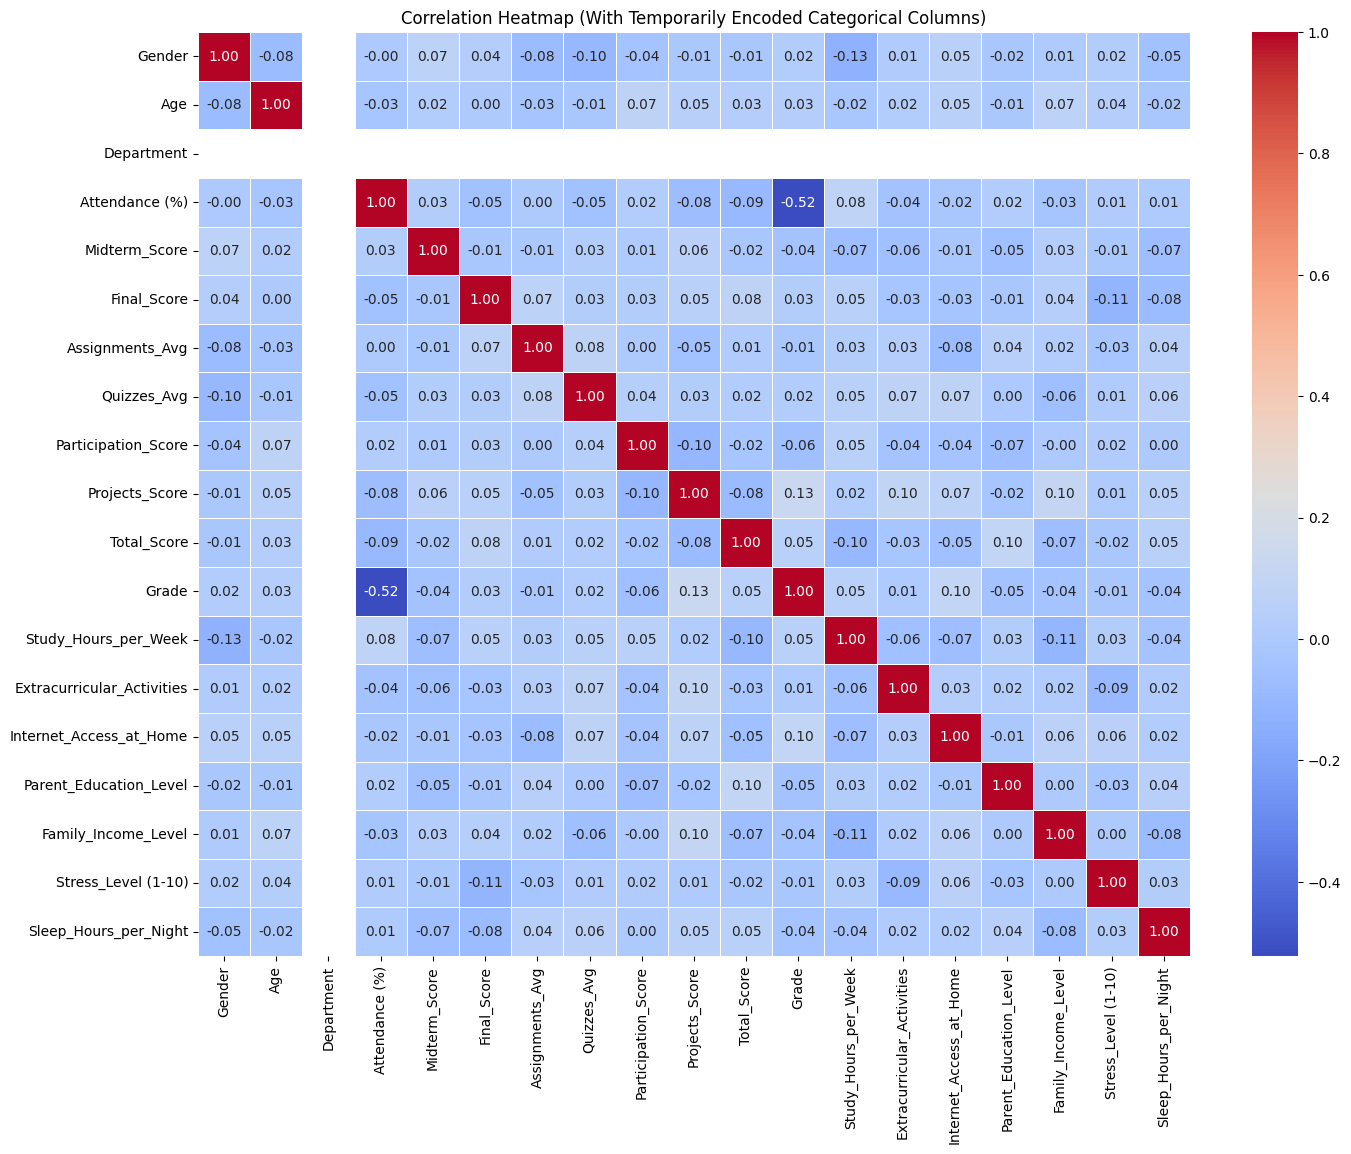

🔍 Top Correlated Column Pairs:
                   Feature 1               Feature 2  Correlation
68            Attendance (%)                   Grade    -0.522328
228     Study_Hours_per_Week                  Gender    -0.130978
182           Projects_Score                   Grade     0.127378
112              Final_Score     Stress_Level (1-10)    -0.112644
244     Study_Hours_per_Week     Family_Income_Level    -0.110171
179           Projects_Score     Participation_Score    -0.104681
187           Projects_Score     Family_Income_Level     0.104247
205              Total_Score  Parent_Education_Level     0.100856
277  Internet_Access_at_Home                   Grade     0.096359
202              Total_Score    Study_Hours_per_Week    -0.096257


In [16]:


# Copy table to avoid modifying the original
temp = math_dp.copy()

# Convert to NumPy array
column_labels = temp.labels
data = temp.to_df().copy()  # needed for LabelEncoder temporarily

# Apply Label Encoding on categorical columns
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

# Flatten correlation matrix to get pairs
corr_unstacked = correlation_matrix.unstack().reset_index()
corr_unstacked.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations
filtered_corr = corr_unstacked[corr_unstacked['Feature 1'] != corr_unstacked['Feature 2']]

# Sort by absolute correlation
filtered_corr = filtered_corr.reindex(filtered_corr['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicates (since correlation is symmetric)
filtered_corr = filtered_corr.iloc[::2]

# Show top correlated pairs
print("🔍 Top Correlated Column Pairs:")
print(filtered_corr.head(10))


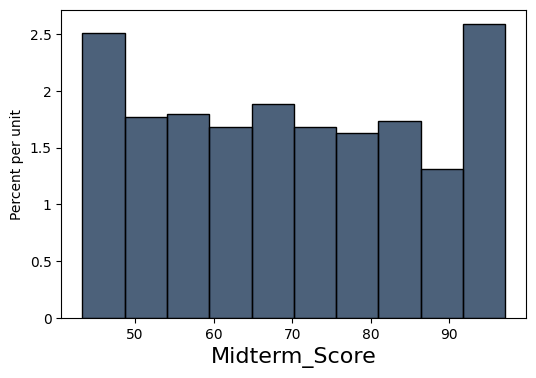

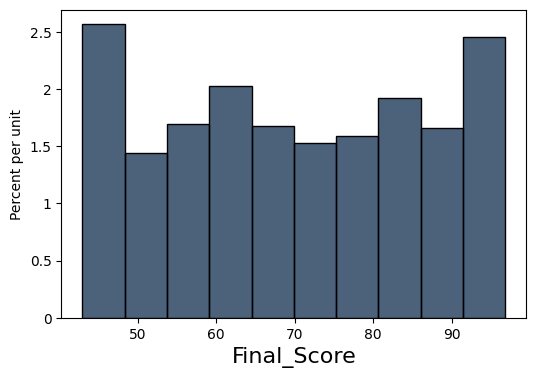

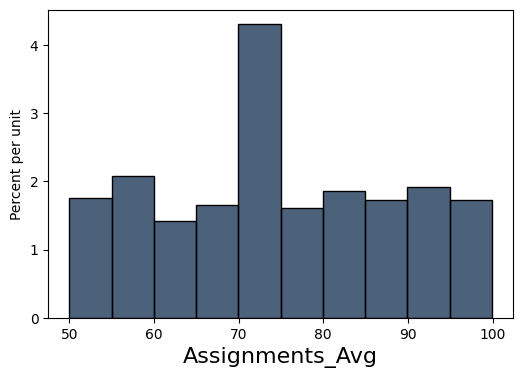

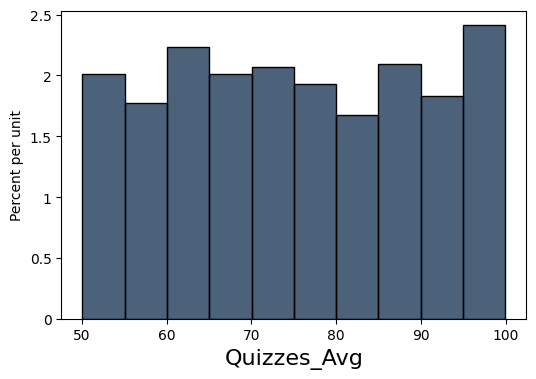

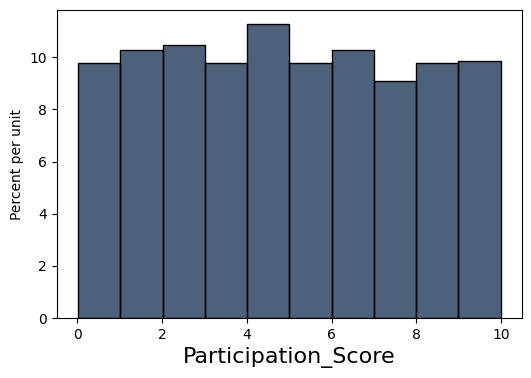

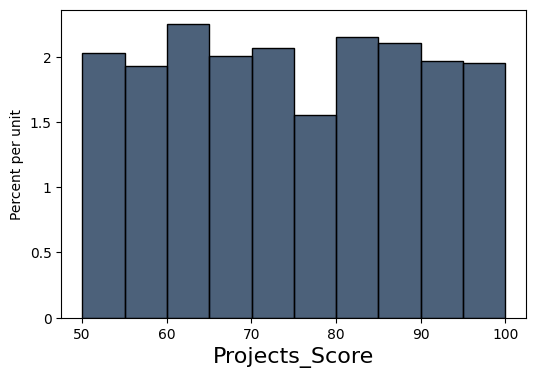

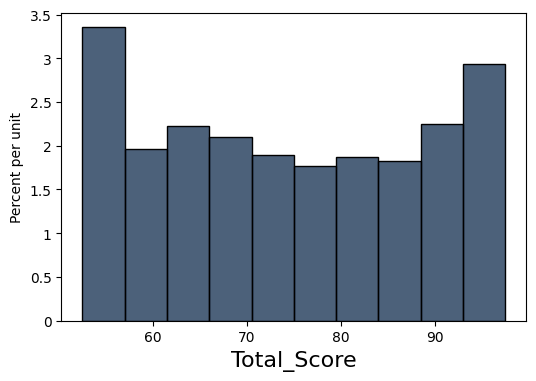

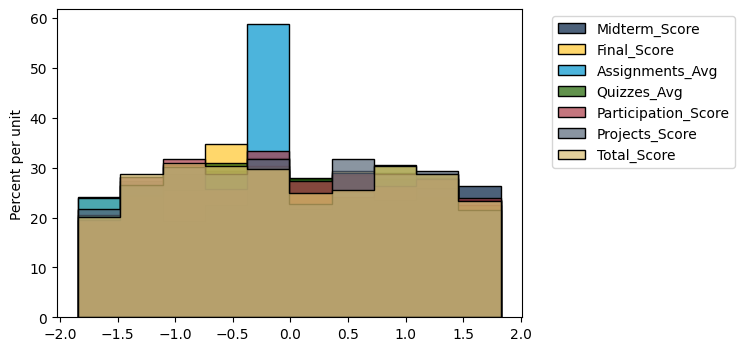

In [17]:
score_bin = np.arange(0,100, 10)

business_dp_af = business_dp.select(

    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

business_dp_af_su = Table().with_columns(

    "Midterm_Score", standard_units( business_dp_af.column("Midterm_Score")),
    "Final_Score", standard_units ( business_dp_af.column("Final_Score")),
    "Assignments_Avg", standard_units (business_dp_af.column("Assignments_Avg")),
    "Quizzes_Avg", standard_units ( business_dp_af.column("Quizzes_Avg")),
    "Participation_Score", standard_units ( business_dp_af.column("Participation_Score")),
    "Projects_Score", standard_units ( business_dp_af.column("Projects_Score")),
    "Total_Score", standard_units ( business_dp_af.column("Total_Score")),
)

column_labels = make_array(
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

for c in column_labels:
    business_dp_af.select(c).hist()
business_dp_af_su.hist()

Đánh giá
- Midterm score và final score có phân phối gần như giống nhau -> cần kiểm định giả thuyết xem nó có thật sự là 1 ko (abs(a-b) = 0 r tính p-value 95%) -> 1 thằng làm gki nát thì cuối kì nó cx sẽ làm nát

Mục tiêu của việc phân tích điểm: cá nhân hoá cách tính tổng kết điểm cho từng department để đơn giản hoá bài toán và từ đây việc tính lifestyle tối ưu để đc điểm tổng này cx sẽ có cơ sở để triển khai hơn

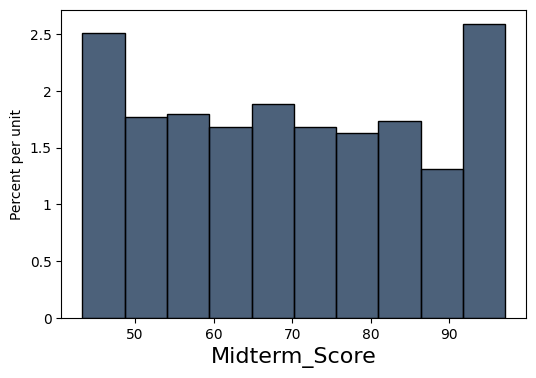

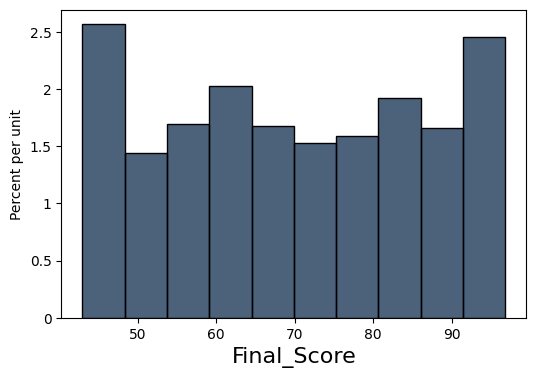

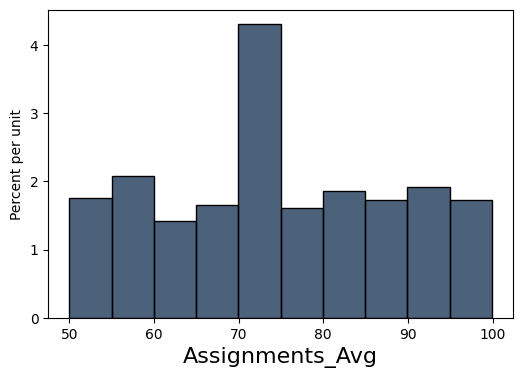

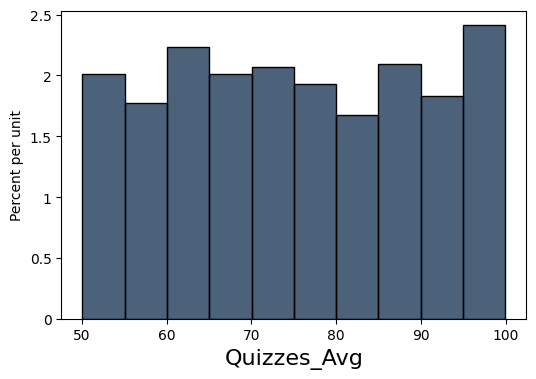

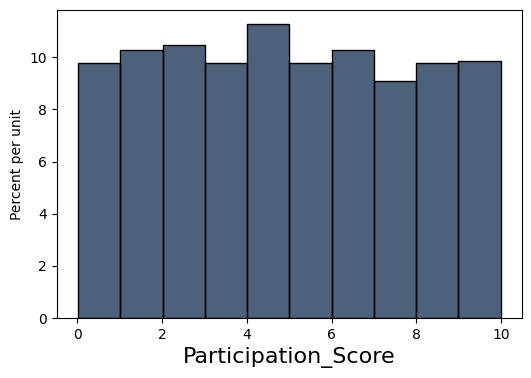

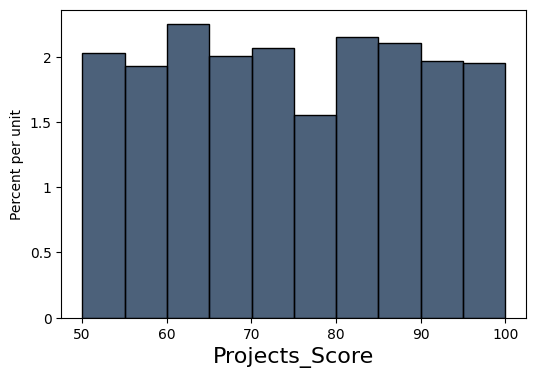

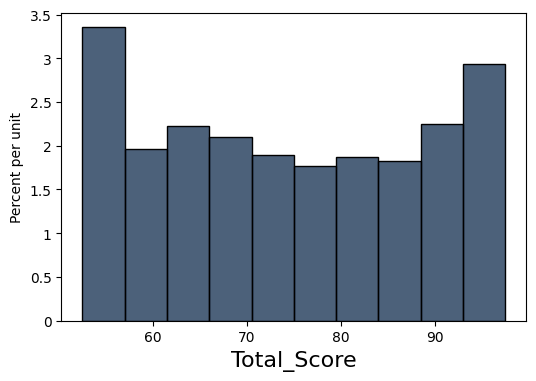

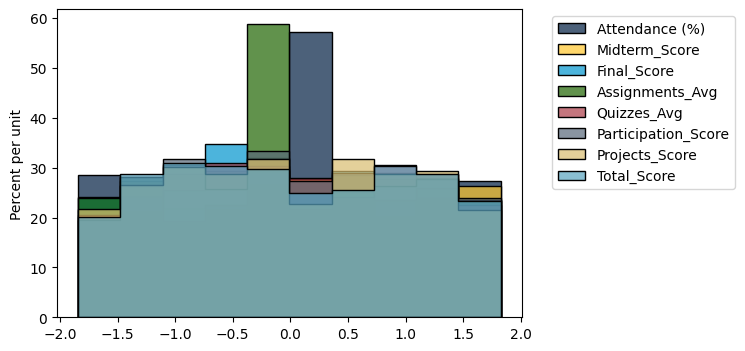

In [18]:
score_bin = np.arange(0,100, 10)

business_dp_af = business_dp.select(
    "Attendance (%)",
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

business_dp_af_su = Table().with_columns(
    "Attendance (%)", standard_units(business_dp_af.column("Attendance (%)")),
    "Midterm_Score", standard_units( business_dp_af.column("Midterm_Score")),
    "Final_Score", standard_units ( business_dp_af.column("Final_Score")),
    "Assignments_Avg", standard_units (business_dp_af.column("Assignments_Avg")),
    "Quizzes_Avg", standard_units ( business_dp_af.column("Quizzes_Avg")),
    "Participation_Score", standard_units ( business_dp_af.column("Participation_Score")),
    "Projects_Score", standard_units ( business_dp_af.column("Projects_Score")),
    "Total_Score", standard_units ( business_dp_af.column("Total_Score")),
)

column_labels = make_array(
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

for c in column_labels:
    business_dp_af.select(c).hist()
business_dp_af_su.hist()

The aim is to utilize student score. The current approach is attempting to find solution for overall score of all the tasks that a student have

In [19]:
business_dp_score = business_dp.select(column_labels)
total_score = make_array(0)

for i in column_labels:
    total_score = total_score + business_dp_score.column(i)

business_dp_total_score = business_dp.with_column('Sum Score', total_score).drop(column_labels).drop('Grade')
business_dp_total_score

Gender,Age,Department,Attendance (%),Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Sum Score
Male,24,Business,57.19,20.7,0,1,Master's,0,6,6.2,463.27
Male,24,Business,57.6,21.3,0,1,Not Reported,0,5,6.4,517.41
Male,18,Business,96.61,22.8,0,1,Not Reported,1,10,7.9,423.81
Female,23,Business,80.22,6.3,0,0,PhD,1,10,7.6,430.81
Male,22,Business,72.01,19.8,0,1,Not Reported,0,8,7.5,477.07
Male,18,Business,52.899,23.5,0,1,High School,2,3,5.6,413.67
Male,18,Business,70.59,12.1,1,1,Not Reported,1,2,7.3,471.103
Female,21,Business,54.84,11.2,1,1,Bachelor's,0,3,4.2,464.36
Female,21,Business,52.899,6.3,0,1,Master's,0,1,5.6,455.72
Male,24,Business,59.36,28.9,0,1,PhD,0,7,8.3,431.68


- Now we have achived a table that purely contain student's lifestyle and their respective performance at school

In [20]:
business_dp_total_score.select('Family_Income_Level', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Sum Score', 'Stress_Level (1-10)', 'Extracurricular_Activities').group('Family_Income_Level', np.average)

Family_Income_Level,Study_Hours_per_Week average,Sleep_Hours_per_Night average,Sum Score average,Stress_Level (1-10) average,Extracurricular_Activities average
0,18.0995,6.46422,445.542,5.40931,0.284314
1,17.4129,6.54306,444.949,5.53828,0.311005
2,18.5856,6.62278,440.544,5.65,0.3


In [21]:
print('Proportion of wealthy family: ' + str(180/(408+180+418) * 100))
business_dp_total_score.select('Family_Income_Level').group('Family_Income_Level')

Proportion of wealthy family: 17.892644135188867


Family_Income_Level,count
0,408
1,418
2,180


Phần lớn gia đình có có con học business đều có kinh tế ở mức thấp đến trung bình, số gia đình khá giả chỉ chiếm khoảng 17.89%

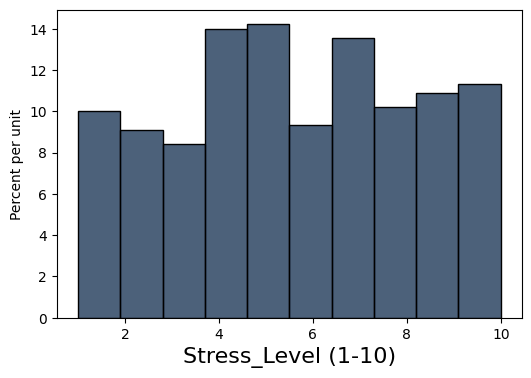

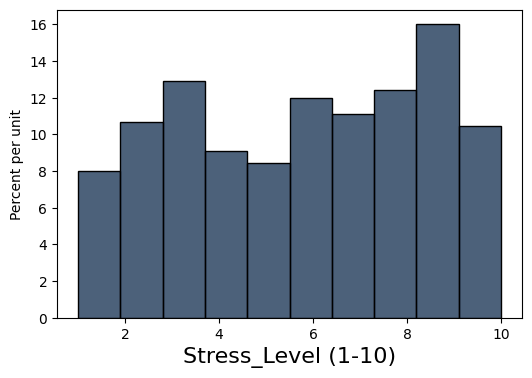

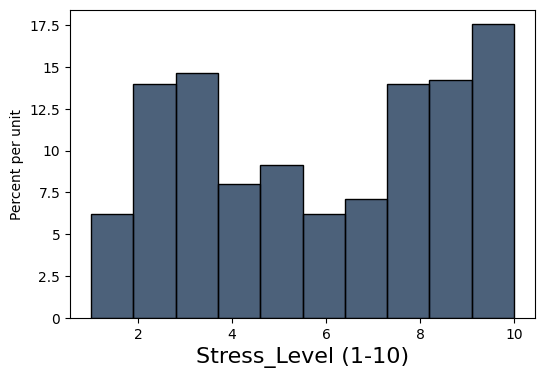

In [22]:
business_dp_total_score.where('Family_Income_Level', 0).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()

- Big found out: interesting statistics here. Các sinh viên có gia đình giàu có sẽ được chia thành 2 nhóm: 1 nhóm thư giãn với stress level thấp hơn đáng kể so với gia đình với mức thu nhập trung bình khá, nhóm còn lại sẽ đặc biệt stress hơn hẳn. Nói chung là hoặc là cực chill, 2 là cực stress, chứ stress mức trung bình thì chiếm khá ít
- Tuy nhiên 1 điểm lưu ý đó là rất hiếm sinh viên thật sự có stress level ở mức từ 0 - 1

Câu hỏi rảnh làm: liệu việc stress có relate tới yếu tố nào trong bảng này k hay do yếu tố ngoại cảnh nằm ngoài phạm vi bài toán?

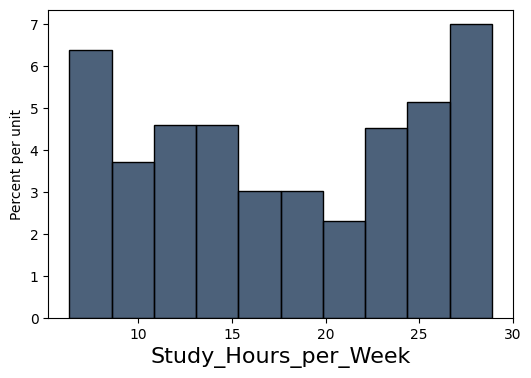

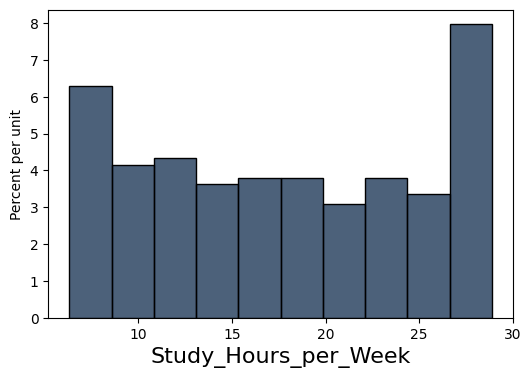

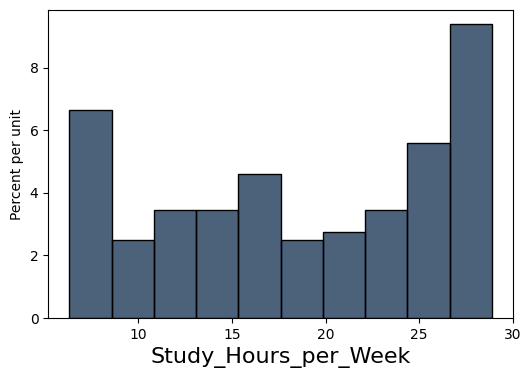

In [23]:
business_dp_total_score.where('Family_Income_Level', 0).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()

- Độ chăm học của nhóm family income là cao nhất
- Có sự phân hoá ở đây, trong khi

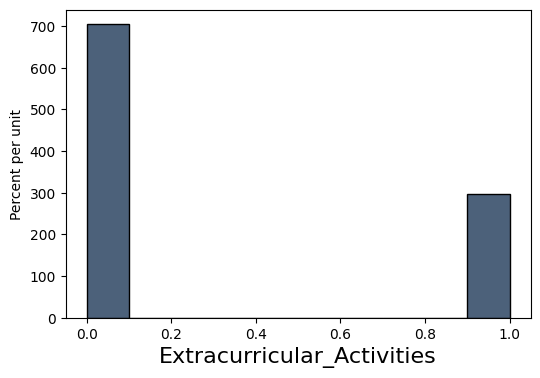

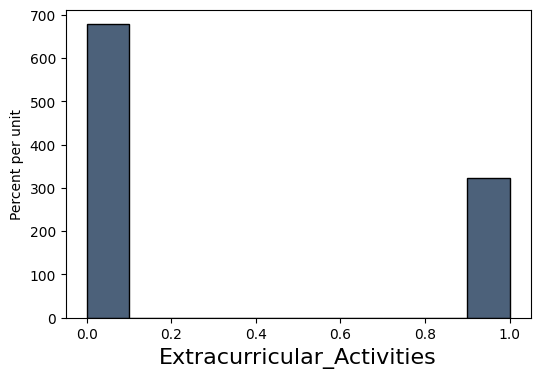

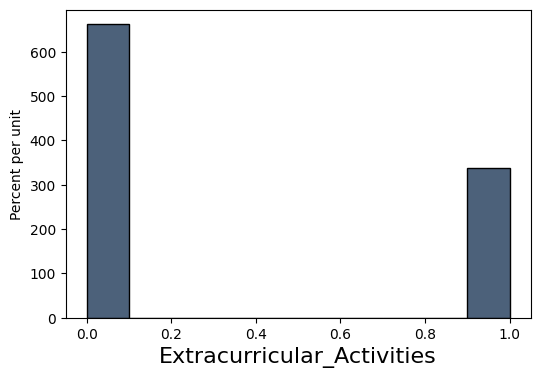

In [24]:
business_dp_total_score.where('Family_Income_Level', 0).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()

- Nhóm gia đình khá giả cũng tham gia hoạt động ngoại khoá nhiều nhất ??!
- Tuy nhiên xét mặt bằng chung thì sinh viên ngành này ít tham gia hoạt động ngoại khoá, khi số sinh viên tham gia chỉ dưới 30% tổng số

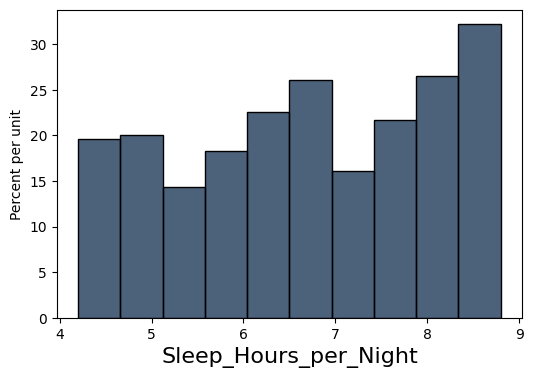

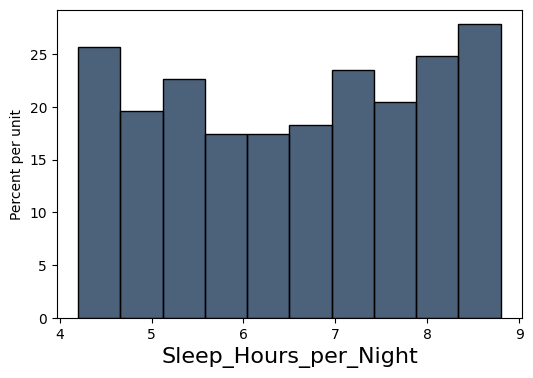

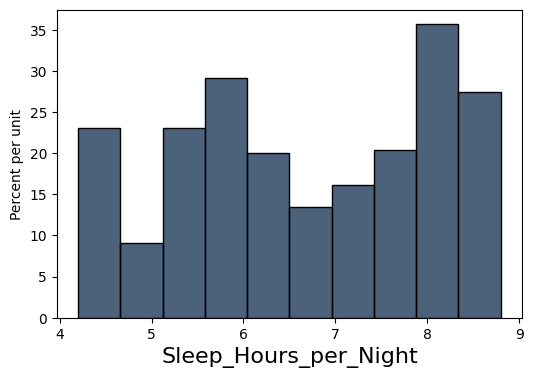

In [25]:
business_dp_total_score.where('Family_Income_Level', 0).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()

- Thật sự bọn nhà giàu điên vãi l khi bọn nó đc ngủ nhiều vcl

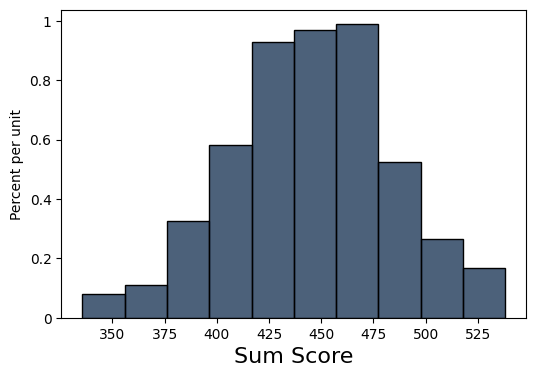

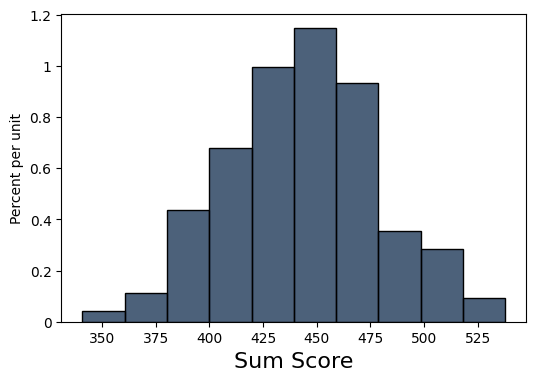

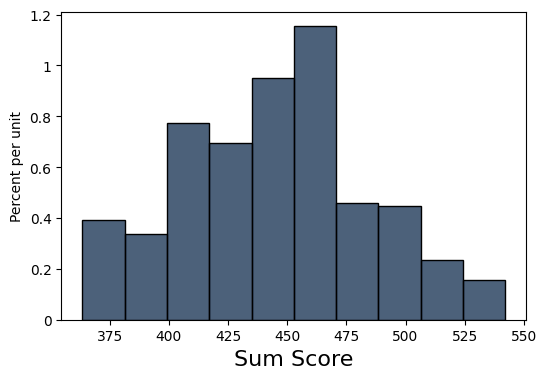

In [26]:
business_dp_total_score.where('Family_Income_Level', 0).select('Sum Score').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Sum Score').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Sum Score').sample(500, with_replacement=True).hist()

- Đây chính là cái giá phải trả cho sự ăn chơi quá đà, khi những đứa nào mà chăm học thì điểm vẫn cao, đứa nào chơi lắm thì điểm như shiet
- Tuy nhiên nếu giỏi thì sẽ giỏi hẳn, hơn mấy đứa nhóm 0 và 1 luôn